# Latent Semantic Analysis

Document-term matrix: (2225, 28980)
[[-9.03542122e-04  3.79601542e-04]
 [-6.11019750e-02  6.38037139e-03]
 [-1.62372277e-04  1.19174835e-05]
 ...
 [-2.39103471e-04  3.79384207e-04]
 [-8.30800239e-04  1.70166811e-03]
 [-5.49711012e-04  1.27421702e-03]],[7.36104005 4.78089159],[[-0.02029779  0.01440386]
 [-0.02513282  0.00132427]
 [-0.01503498 -0.00047428]
 ...
 [-0.02447232  0.00391356]
 [-0.01555672 -0.00243412]
 [-0.03451724  0.03126474]]
U: (28980, 2), sigma: (2,), V: (2225, 2)


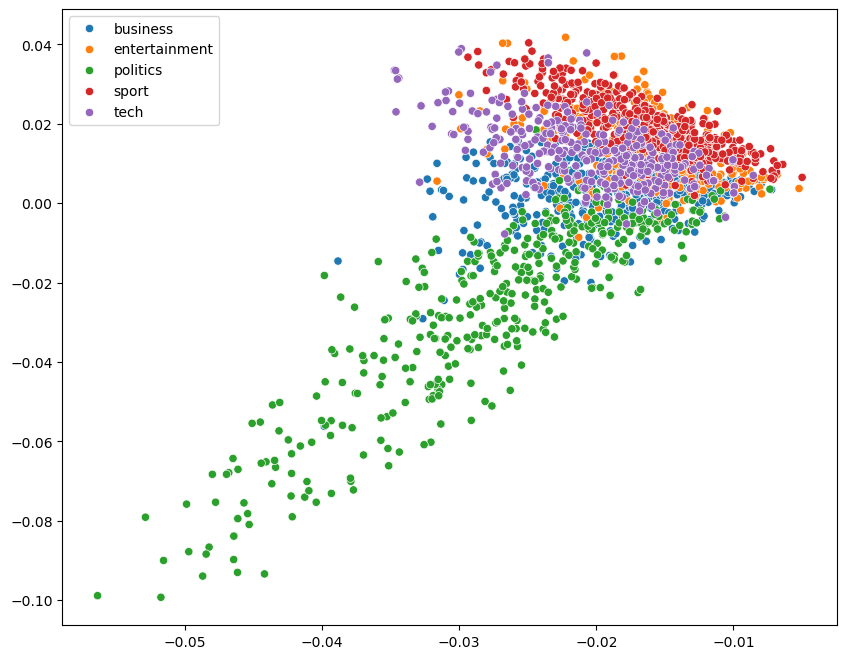

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh

def svd_eig(A, k=None):
    m, n = A.shape
    if k is None or k > n:
        k = n
    
    if sp.issparse(A):
        AtA = (A.T).dot(A)
    else:
        AtA = np.dot(A.T, A)

    if k < n:
        eigvals, V = eigsh(AtA, k=k, which = 'LM')
    else:
        eigvals, V = np.linalg.eigh(AtA)

    if V.ndim == 1:
        V = V[:, np.newaxis]

    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    V = V[:, idx]

    sigma = np.sqrt(np.maximum(eigvals, 0))

    U = np.zeros((m, k))

    for i in range(k):
        if sigma[i] > 1e-10:
            U[:, i] = A @ V[:, i] / sigma[i]
        else:
            U[:, i] = A @ V[:, i]
    print(f"{U},{sigma},{V}")
    return U, sigma, V
bbc_data = pd.read_csv('../data/bbc-news-data.csv', sep = '\t')

category = bbc_data.category.tolist()
documents = bbc_data.content.tolist()

vectorizer = TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(documents)

print(f"Document-term matrix: {X.shape}")

k = 2
U, sigma, V = svd_eig(X.T, k=k)
print(f"U: {U.shape}, sigma: {sigma.shape}, V: {V.shape}")

num_clusters = 5
kmeans = KMeans(n_clusters = num_clusters)
kmeans.fit(V)

plt.figure(figsize = (10,8))
sns.scatterplot(x = V[:,0], y = V[:,1], hue = category)
plt.show()